<a href="https://colab.research.google.com/github/celiahc823/MCD_UNISON/blob/main/AnalyzingCrime_in_Los_Angeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Los Angeles skyline**

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World!

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [4]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
crimes = pd.read_csv("/content/sample_data/crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [6]:
# validar que 'TIME OCC' tenga siempre 4 dígitos (rellenando con ceros si es necesario)
crimes['TIME OCC'] = crimes['TIME OCC'].str.zfill(4)

In [7]:
crimes['crime_hour'] = crimes['TIME OCC'].str[:2].astype(int)  # Extraer la hora en entero

# filtrar los crimenes ocurridos entre 22:00 y 03:59
night_crimes = crimes[(crimes['crime_hour'] >= 22) | (crimes['crime_hour'] <= 3)]

In [8]:
# Área con la mayor cantidad de crímenes nocturnos
peak_night_crime_location = night_crimes['AREA NAME'].value_counts().idxmax()
print(f"The area with the highest frequency of night crimes: {peak_night_crime_location}")

The area with the highest frequency of night crimes: Central


age_group
0-17      4483
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
99+      14747
Name: count, dtype: int64


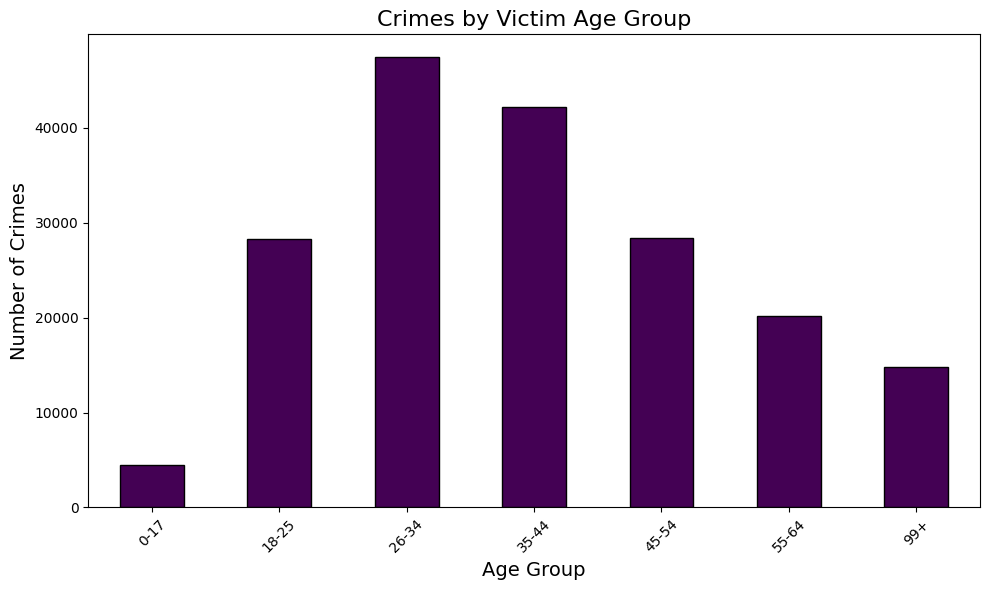

In [13]:
if 'Vict Age' in crimes.columns:
    # Calcular los límites dinámicos basados en los datos reales
    min_age = crimes['Vict Age'].min()  # Edad mínima
    max_age = crimes['Vict Age'].max()  # Edad máxima

    # Definir age bins dinámicamente
    age_bins = [min_age, 17, 25, 34, 44, 54, 64, max_age]
    age_labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', f'{int(max_age)}+']
if 'Vict Age' in crimes.columns:
    # crear la colunma age_group
    crimes['age_group'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels, right=True)

    # Contar los crímenes por grupo de edad
    victim_ages = crimes['age_group'].value_counts(sort=False)

    # Mostrar los resultados
    print(victim_ages)

    # Visualización de los datos
    plt.figure(figsize=(10, 6))
    victim_ages.plot(kind='bar', colormap='viridis', edgecolor='black')
    plt.title('Crimes by Victim Age Group', fontsize=16)
    plt.xlabel('Age Group', fontsize=14)
    plt.ylabel('Number of Crimes', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    raise ValueError("La columna 'Vict Age' no está presente en el dataset.")